# Extracting Data  From Excel Files And Importing Libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# fetching data from the system using pandas library.


general_data=pd.read_csv(r"D:\User Data\Desktop\nishant\foxmula\1.hr-analytics-case-study\general_data.csv")
in_time=pd.read_csv(r"D:\User Data\Desktop\nishant\foxmula\1.hr-analytics-case-study\in_time.csv")
out_time=pd.read_csv(r"D:\User Data\Desktop\nishant\foxmula\1.hr-analytics-case-study\out_time.csv")


# General Data of employee.

In [7]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


## Cheking Null Value and Treating Null Value In Employee General Data

In [4]:
# checking the number of null fields in the data.

general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [6]:
# Calculating the percentage null value.

general_data.isnull().sum()/general_data.shape[0]

Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
EmployeeID                 0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.004308
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.002041
TrainingTimesLastYear      0.000000
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
YearsWithCurrManager       0.000000
dtype: float64

### Columns containg Null values are:
    . NumCompaniesWorked
    . TotalWorkingYears

In [7]:
# Calculating the median value to fill the null values.

a=general_data.NumCompaniesWorked.median()
b=general_data.TotalWorkingYears.median()
r=pd.DataFrame(data={"Columns":["NumCompaniesWorked","TotalWorkingYears"],"median":[a,b]})
print(r)

              Columns  median
0  NumCompaniesWorked     2.0
1   TotalWorkingYears    10.0


In [8]:
# filling the null values with the median values.

general_data.NumCompaniesWorked=general_data.NumCompaniesWorked.fillna(a)
general_data.TotalWorkingYears=general_data.TotalWorkingYears.fillna(b)

# Recheck the info

general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## Analysis Employee General Data

                
                   
           
               
       
                   
         
               
            
           
    
            
       
         

### Employee Attrion distribution.


In [56]:
value=general_data.Attrition.value_counts()
print("Number of employee retain: ",value[0],"\n")
print("Number of employee leave: ",value[1],"\n")
attrition_rate=((value[1])/(value[0]+value[1]))*100
print("Attrition Rate: ",attrition_rate,"%")

Number of employee retain:  3699 

Number of employee leave:  711 

Attrition Rate:  16.122448979591837 %


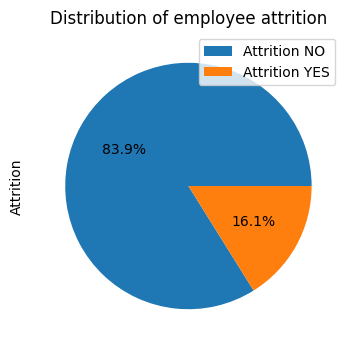

In [51]:
# representing attrition data using pie plot.

general_data.Attrition.value_counts().plot(kind="pie",autopct="%0.1f%%",labels=None,figsize=(8,4))
plt.title("Distribution of employee attrition")
plt.legend(labels=["Attrition NO","Attrition YES"])

## From the Pie Chart, we can infer that out of 4410 employees, 16.1% of the employees left their job due to some reasons whereas other 83.9% of the employees preferred to continue their job at the company.

### Removing useless features
    .StandardHours
    .StockOptionLevel 
    .EmployeeID
    .EmployeeCount
    .Over18

In [53]:
# removing Useless features 
general_data=general_data.drop(columns=["StandardHours","StockOptionLevel","EmployeeID","EmployeeCount","Over18"])
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,9.0,2,6,0,4


### Analysis of Business Travel Feature

In [63]:
# Attrition Vs Business Travel

general_data.groupby("BusinessTravel")["Attrition"].value_counts().unstack()

Attrition,No,Yes
BusinessTravel,,
Non-Travel,414,36
Travel_Frequently,624,207
Travel_Rarely,2661,468


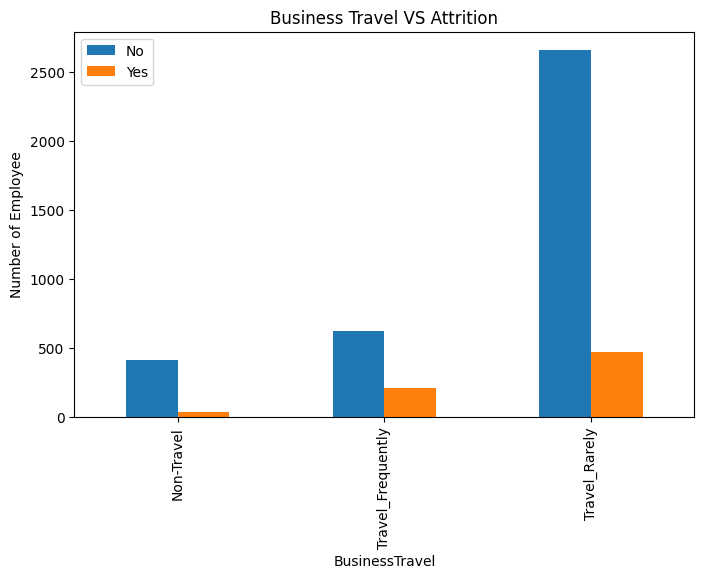

In [70]:
# Repesenting Attrition vs Business Travel data using Bar graph.

data=general_data.groupby("BusinessTravel")["Attrition"].value_counts().unstack()
data.plot(kind="bar",figsize=(8,5))
plt.title("Business Travel VS Attrition")
plt.ylabel("Number of Employee")
plt.legend(loc="upper left")

## From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently 

### Analysis of Work Experience Feature
    .TotalWorkingYears
    .TrainingTimesLastYear
    .YearsAtCompany 
    .YearsSinceLastPromotion
    .YearsWithCurrManager 

In [72]:
# Display the Work Expreience Features.

data=general_data[["TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]]
data.head()

,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1.0,6,1,0,0
1,6.0,3,5,1,4
2,5.0,2,5,0,3
3,13.0,5,8,7,5
4,9.0,2,6,0,4


Text(0, 0.5, 'Number of Employee')

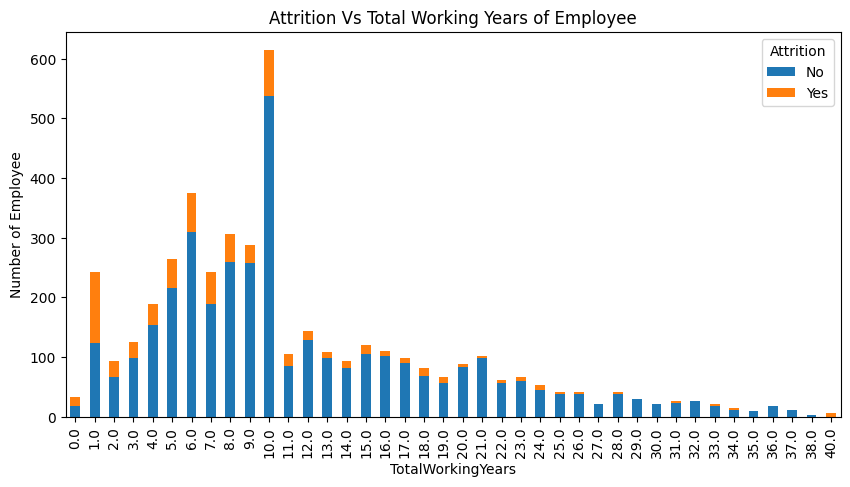

In [81]:
# analysing attrition of employee with total working year of employee in the company.

data=general_data.groupby("TotalWorkingYears")["Attrition"].value_counts().unstack()
data.plot(kind="bar",stacked='False',figsize=(10,5))
plt.title("Attrition Vs Total Working Years of Employee")
plt.ylabel("Number of Employee")

Text(0, 0.5, 'Number of Employee')

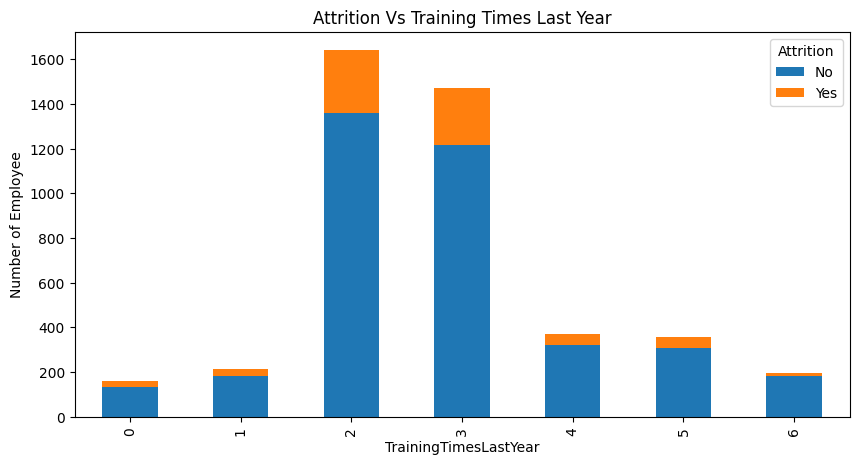

In [82]:
# analysing attrition of employee with total working year of employee in the company.

data=general_data.groupby("TrainingTimesLastYear")["Attrition"].value_counts().unstack()
data.plot(kind="bar",stacked='False',figsize=(10,5))
plt.title("Attrition Vs Training Times Last Year")
plt.ylabel("Number of Employee")


#### It is observed that the  employees who have two trainings last year quit their jobs most,followed by three trainings last year.

Text(0, 0.5, 'Number of Employee')

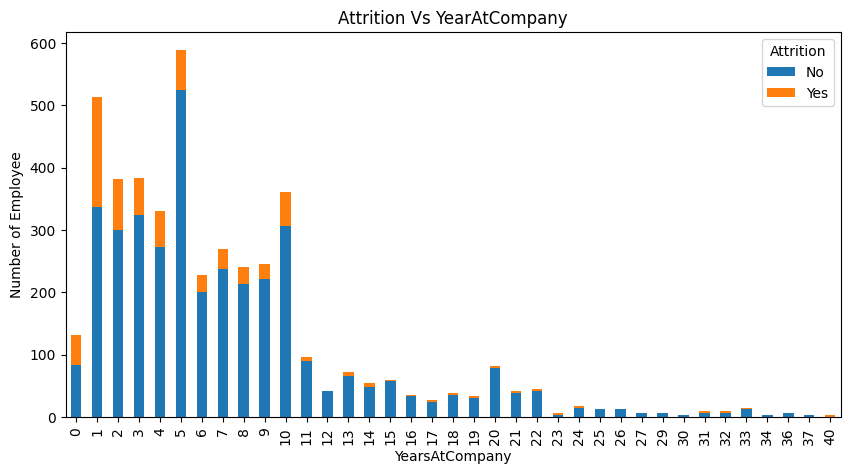

In [83]:
# analysing attrition of employee with years at company.

data=general_data.groupby("YearsAtCompany")["Attrition"].value_counts().unstack()
data.plot(kind="bar",stacked='False',figsize=(10,5))
plt.title("Attrition Vs YearAtCompany")
plt.ylabel("Number of Employee")

#### It is observed that the newly arriving employees quit their jobs most,so more concern should be given to the freshers and their cause of leaving the company should be figured out.

Text(0, 0.5, 'Number of Employee')

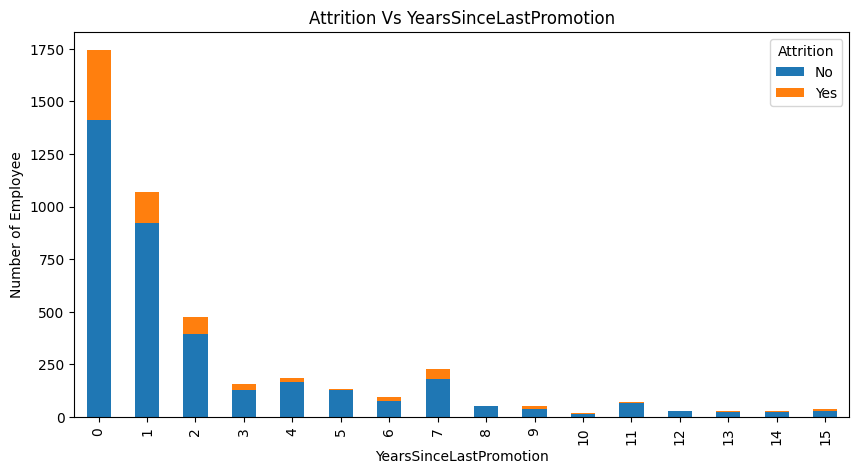

In [84]:
# analysing attrition of employee with YearsSinceLastPromotion.

data=general_data.groupby("YearsSinceLastPromotion")["Attrition"].value_counts().unstack()
data.plot(kind="bar",stacked='False',figsize=(10,5))
plt.title("Attrition Vs YearsSinceLastPromotion")
plt.ylabel("Number of Employee")

#### it is very clear that Employees who are in same post or not getting promoted tend to leave the company most

Text(0, 0.5, 'Number of Employee')

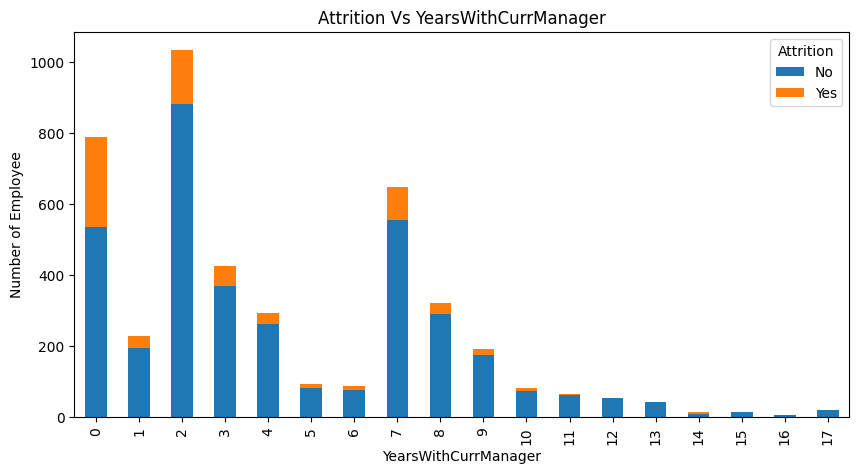

In [85]:
# analysing attrition of employee with YearsWithCurrManager.

data=general_data.groupby("YearsWithCurrManager")["Attrition"].value_counts().unstack()
data.plot(kind="bar",stacked='False',figsize=(10,5))
plt.title("Attrition Vs YearsWithCurrManager")
plt.ylabel("Number of Employee")

#### From the above plot it is observed that attrition rate is higher in initail years.

### Department wise Attrition.

In [88]:
# distribution of attrition rate in department.

general_data.groupby("Department")["Attrition"].value_counts().unstack()

Attrition,No,Yes
Department,,
Human Resources,132,57
Research & Development,2430,453
Sales,1137,201


Text(0, 0.5, 'Number of employee')

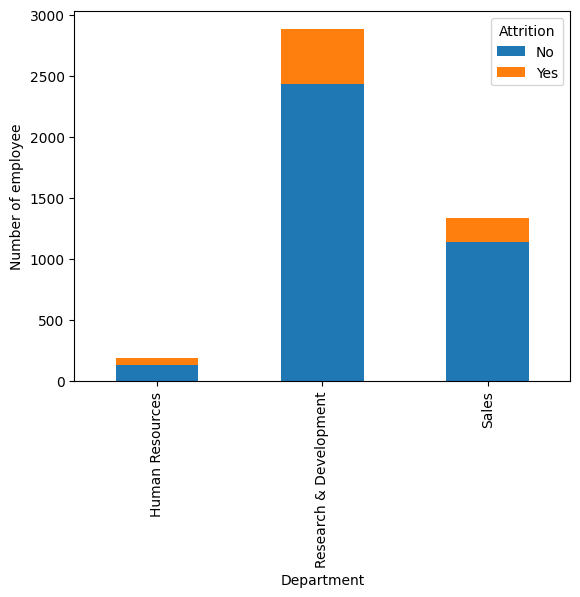

In [97]:
data=general_data.groupby("Department")["Attrition"].value_counts().unstack()
data.plot(kind="bar",stacked='False')
plt.ylabel("Number of employee")

### Attrition Vs Age

In [4]:
# distribution of attrition rate in department.

data=general_data.groupby("Age")["Attrition"].value_counts().unstack()
data.head()

Attrition,No,Yes
Age,,
18,12.0,12.0
19,9.0,18.0
20,15.0,18.0
21,21.0,18.0
22,33.0,15.0


Text(0, 0.5, 'Number of employee')

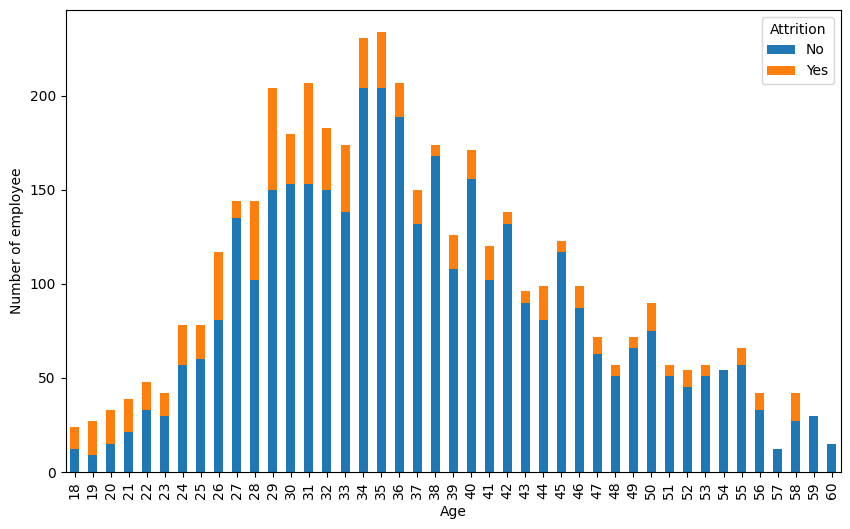

In [6]:
data=general_data.groupby("Age")["Attrition"].value_counts().unstack()
data.plot(kind="bar",stacked='False',figsize=(10,6))
plt.ylabel("Number of employee")

#### In the above bar graph we observe that employee of age between 34-36 has higher attrition rate.

In [9]:
# distribution of attrition rate in department.

data=general_data.groupby("DistanceFromHome")["Attrition"].value_counts().unstack()
data.head()

Attrition,No,Yes
DistanceFromHome,,
1,528,96
2,519,114
3,222,30
4,159,33
5,165,30


Text(0, 0.5, 'Number of employee')

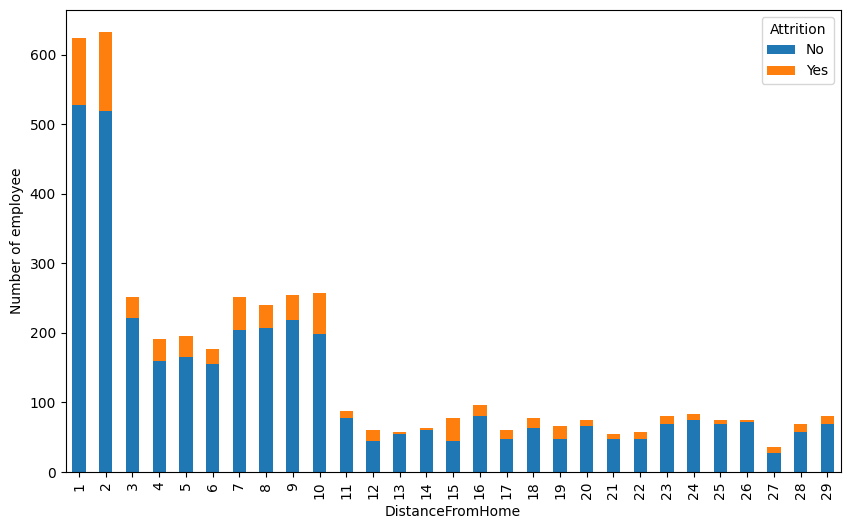

In [11]:
# distribution of attrition rate by distance from home.
data=general_data.groupby("DistanceFromHome")["Attrition"].value_counts().unstack()
data.plot(kind="bar",stacked='False',figsize=(10,6))
plt.ylabel("Number of employee")

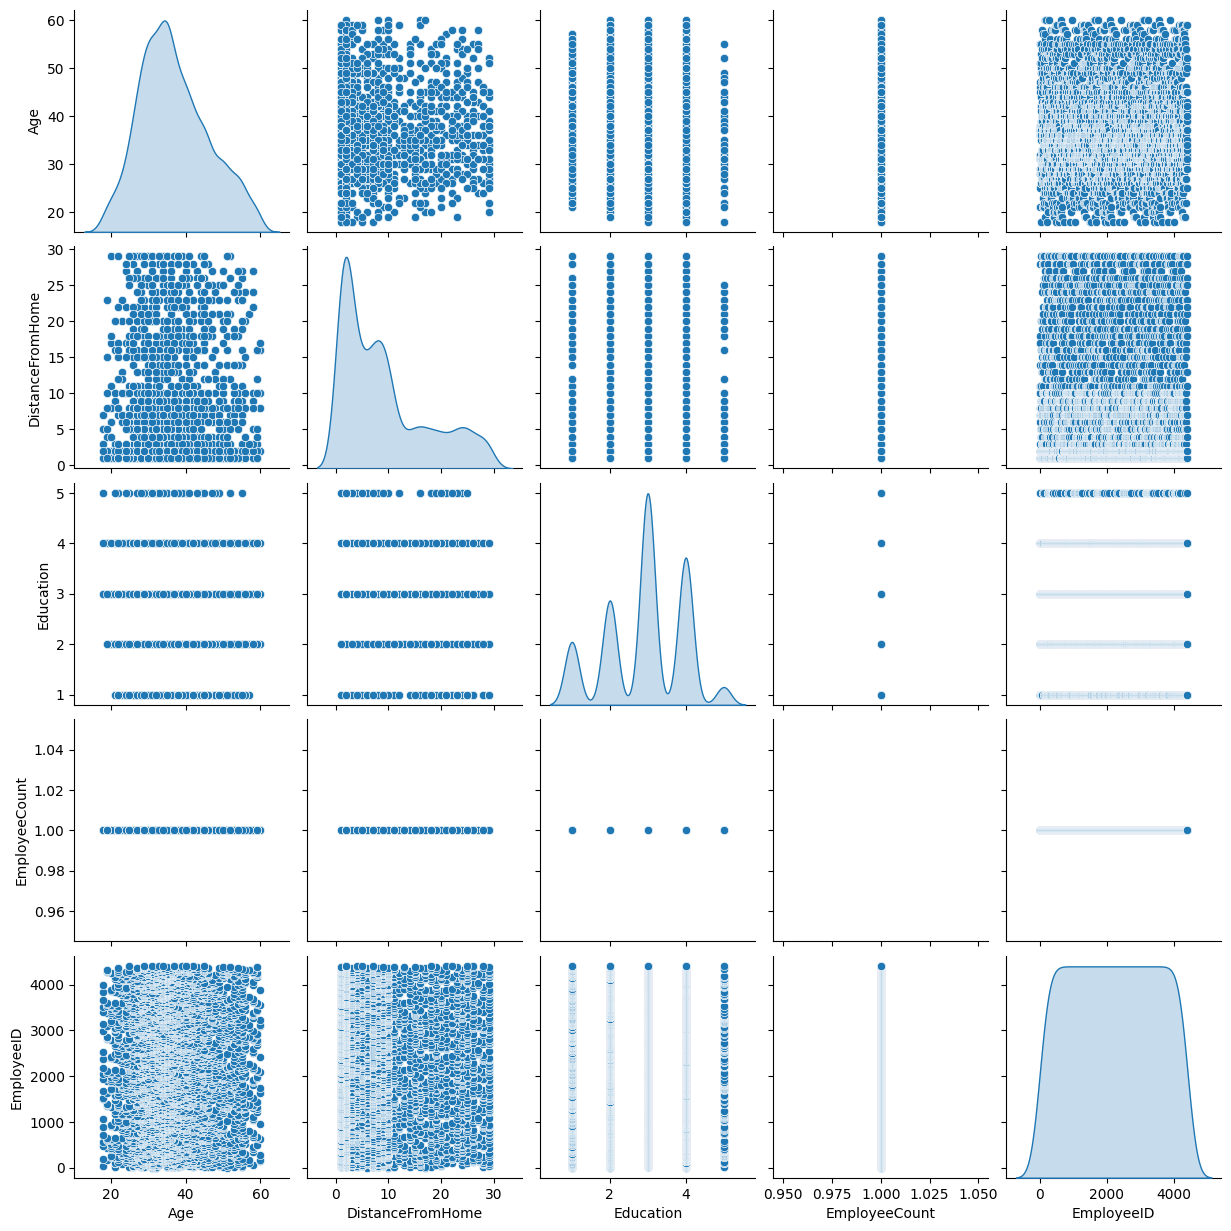

In [8]:
# representing relation between different features.
import seaborn as sns
data = general_data.iloc[:, 0:10]
sns.pairplot(data, diag_kind='kde')

In [10]:
# distribution of attrition rate by distance from home.

data=general_data.groupby("MonthlyIncome")["Attrition"].value_counts()
print(data)
data.plot(kind="scatter",stacked='False',figsize=(10,6))
plt.ylabel("Number of employee")

MonthlyIncome  Attrition
10090          Yes          3
10510          No           3
10520          No           3
10810          No           3
10910          No           3
                           ..
198590         Yes          3
199260         No           3
199430         No           3
199730         No           3
199990         No           3
Name: Attrition, Length: 1381, dtype: int64


ValueError: plot kind scatter can only be used for data frames